In [1]:
# initiate: import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import sys
import logging
logging.disable(sys.maxsize)

pd.set_option('display.max_columns', None)

### Dataset

In [3]:
### Rainfall example from https://statweb.stanford.edu/~owen/mc/
### Number of rainfalls events in the coming month is S ~ Poi(lambda), lambda = 2.9
### The depth of rainfall in the storm i is Di ~ Weib(k, sigma) with k = 0.8 and sigma = 3
### X = sum Di over all rainfalls
### f(X) = I (X < 5)
### Find the mean distribution of E(f(x))

In [27]:
from scipy.stats import weibull_min

In [41]:
lam = 2.9
N = 1000
# shape
k = 0.8
# scale
sigma = 3

num_of_rainfalls = np.random.poisson(lam=lam, size=N)
rainfalls_depth = []

for rainfall in num_of_rainfalls:
    weibull_samples =  weibull_min.rvs(k, loc=0, scale=sigma, size=rainfall)
    rainfalls_depth.append(np.sum(weibull_samples))
    

Text(0,0.5,'Total rainfall(cm)')

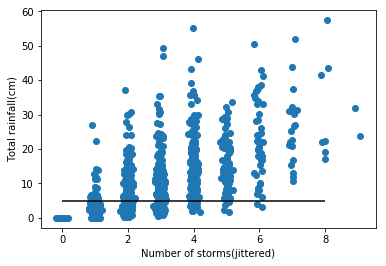

In [43]:
plt.scatter(num_of_rainfalls+np.random.normal(0,0.07,size=N),
            rainfalls_depth)
plt.hlines(y=5, 
           xmin=0,
           xmax=8)
plt.xlabel("Number of storms(jittered)")
plt.ylabel("Total rainfall(cm)")

### Variance of ordinary sample mean x

In [46]:
lam = 2.9
N = 1000
# shape
k = 0.8
# scale
sigma = 3
sim = 10000
x_bars = []

for i in range(sim):
    num_of_rainfalls = np.random.poisson(lam=lam, size=N)
    rainfalls_depth = []

    for rainfall in num_of_rainfalls:
        weibull_samples =  weibull_min.rvs(k, loc=0, scale=sigma, size=rainfall)
        rainfalls_depth.append(np.sum(weibull_samples))
    x_bars.append(np.mean(np.array(rainfalls_depth) < 5))

0.375841
0.01528890182452619


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


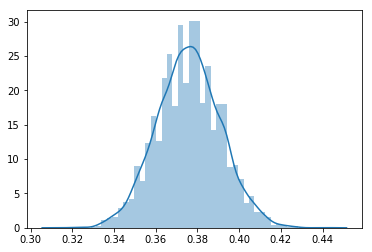

In [47]:
sns.distplot(np.array(x_bars))
print(np.mean(x_bars))
print(np.std(x_bars))

In [49]:
np.sqrt(0.375841*(1-0.375841)/1000)

0.015316152999986649